In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [23]:
warnings.filterwarnings('ignore')

In [24]:

data = pd.read_csv('/Users/nikhitapulivarthi/Desktop/Restaurant_Reviews.tsv', sep ='\t')

data.head()


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [25]:
import pandas as pd

# Example negative reviews
additional_negative_reviews = [
    "The service was terrible and the food was disappointing.",
    "I was very disappointed with the quality of the meal.",
    "The restaurant was dirty, and the staff was rude.",
    "Poor quality food, I would not recommend this place.",
    "Bad experience overall, the waiting time was too long.",
    "The ambiance was awful, and the food was not fresh.",
    "Terrible service, I will not be coming back.",
    "The food tasted bad and was overpriced.",
    "The place was crowded and the food was disappointing.",
    "The experience was poor, and the customer service was lacking."
]

# Creating a DataFrame from these additional reviews
new_data = pd.DataFrame({
    'Review': additional_negative_reviews,
    'Liked': [0] * len(additional_negative_reviews)  # Label 0 for Negative
})

# Combine the existing data with the new negative reviews
data = pd.concat([data, new_data], ignore_index=True)

# Display the updated dataset
print(data)


                                                 Review  Liked
0                              Wow... Loved this place.      1
1                                    Crust is not good.      0
2             Not tasty and the texture was just nasty.      0
3     Stopped by during the late May bank holiday of...      1
4     The selection on the menu was great and so wer...      1
...                                                 ...    ...
1005  The ambiance was awful, and the food was not f...      0
1006       Terrible service, I will not be coming back.      0
1007            The food tasted bad and was overpriced.      0
1008  The place was crowded and the food was disappo...      0
1009  The experience was poor, and the customer serv...      0

[1010 rows x 2 columns]


In [26]:
data.shape

(1010, 2)

In [27]:
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [28]:
data['Liked'].value_counts()

Liked
0    510
1    500
Name: count, dtype: int64

In [29]:
data['char_count']=data['Review'].apply(len)

In [30]:
data.head()

,Review,Liked,char_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [31]:
data['word_count'] = data['Review'].apply(lambda x: len(x.split()))


In [32]:
data.head()

,Review,Liked,char_count,word_count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [33]:
import nltk
nltk.download('punkt')  # Download the punkt tokenizer for sentence tokenization

from nltk.tokenize import sent_tokenize

# Add a new column for sentence count
data['sentence_count'] = data['Review'].apply(lambda x: len(sent_tokenize(x)))


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nikhitapulivarthi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
data.head(50)

,Review,Liked,char_count,word_count,sentence_count
0,Wow... Loved this place.,1,24,4,2
1,Crust is not good.,0,18,4,1
2,Not tasty and the texture was just nasty.,0,41,8,1
3,Stopped by during the late May bank holiday of...,1,87,15,1
4,The selection on the menu was great and so wer...,1,59,12,1
5,Now I am getting angry and I want my damn pho.,0,46,11,1
6,Honeslty it didn't taste THAT fresh.),0,37,6,1
7,The potatoes were like rubber and you could te...,0,111,22,1
8,The fries were great too.,1,25,5,1
9,A great touch.,1,14,3,1


In [35]:
data[data['Liked']==1]['char_count'].mean()

55.88

In [36]:
data[data['Liked']==0]['char_count'].mean()

60.56470588235294

In [37]:
import re
def tokenize_review(review):
    # Remove non-alphabetic characters
    review = re.sub('[^a-zA-Z]', ' ', review)
    # Convert to lowercase
    review = review.lower()
    # Tokenize the review
    tokens = review.split()
    return tokens


In [38]:
data['Tokenized_Reviews'] = data['Review'].apply(tokenize_review)


In [39]:
data[['Review', 'Tokenized_Reviews']]

,Review,Tokenized_Reviews
0,Wow... Loved this place.,"[wow, loved, this, place]"
1,Crust is not good.,"[crust, is, not, good]"
2,Not tasty and the texture was just nasty.,"[not, tasty, and, the, texture, was, just, nasty]"
3,Stopped by during the late May bank holiday of...,"[stopped, by, during, the, late, may, bank, ho..."
4,The selection on the menu was great and so wer...,"[the, selection, on, the, menu, was, great, an..."
...,...,...
1005,"The ambiance was awful, and the food was not f...","[the, ambiance, was, awful, and, the, food, wa..."
1006,"Terrible service, I will not be coming back.","[terrible, service, i, will, not, be, coming, ..."
1007,The food tasted bad and was overpriced.,"[the, food, tasted, bad, and, was, overpriced]"
1008,The place was crowded and the food was disappo...,"[the, place, was, crowded, and, the, food, was..."


In [40]:
from nltk.corpus import stopwords
import nltk

# Download stopwords if you haven't already
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikhitapulivarthi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
stop_words = set(stopwords.words('english'))
stop_words.remove('not')
def remove_stopwords(tokens):
    # Remove stopwords from the tokenized review
    return [word for word in tokens if word not in stop_words]

# Remove stopwords
data['Filtered_Reviews'] = data['Tokenized_Reviews'].apply(remove_stopwords)

# Display the output
data[['Review', 'Tokenized_Reviews','Filtered_Reviews']]


,Review,Tokenized_Reviews,Filtered_Reviews
0,Wow... Loved this place.,"[wow, loved, this, place]","[wow, loved, place]"
1,Crust is not good.,"[crust, is, not, good]","[crust, not, good]"
2,Not tasty and the texture was just nasty.,"[not, tasty, and, the, texture, was, just, nasty]","[not, tasty, texture, nasty]"
3,Stopped by during the late May bank holiday of...,"[stopped, by, during, the, late, may, bank, ho...","[stopped, late, may, bank, holiday, rick, stev..."
4,The selection on the menu was great and so wer...,"[the, selection, on, the, menu, was, great, an...","[selection, menu, great, prices]"
...,...,...,...
1005,"The ambiance was awful, and the food was not f...","[the, ambiance, was, awful, and, the, food, wa...","[ambiance, awful, food, not, fresh]"
1006,"Terrible service, I will not be coming back.","[terrible, service, i, will, not, be, coming, ...","[terrible, service, not, coming, back]"
1007,The food tasted bad and was overpriced.,"[the, food, tasted, bad, and, was, overpriced]","[food, tasted, bad, overpriced]"
1008,The place was crowded and the food was disappo...,"[the, place, was, crowded, and, the, food, was...","[place, crowded, food, disappointing]"


In [42]:

from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

def stem_tokens(tokens):
    # Stem each token in the list
    return [stemmer.stem(token) for token in tokens]

# Apply stemming to the Tokenized_Reviews column
data['Stemmed_Reviews'] = data['Filtered_Reviews'].apply(stem_tokens)

# Show the resulting DataFrame
data[['Review', 'Stemmed_Reviews']].head()


,Review,Stemmed_Reviews
0,Wow... Loved this place.,"[wow, love, place]"
1,Crust is not good.,"[crust, not, good]"
2,Not tasty and the texture was just nasty.,"[not, tasti, textur, nasti]"
3,Stopped by during the late May bank holiday of...,"[stop, late, may, bank, holiday, rick, steve, ..."
4,The selection on the menu was great and so wer...,"[select, menu, great, price]"


In [43]:
pip install wordcloud matplotlib


Note: you may need to restart the kernel to use updated packages.


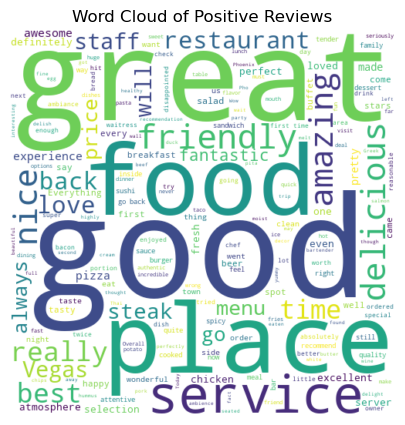

In [44]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter the DataFrame for positive reviews (where Liked is 1)
positive_reviews = data[data['Liked'] == 1]  # Use the correct column name for positive sentiment

# Combine all positive reviews into a single string
all_positive_reviews = ' '.join(positive_reviews['Review'])

# Generate the word cloud
wordcloud = WordCloud(width=500, height=500, background_color='white').generate(all_positive_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Positive Reviews')
plt.show()


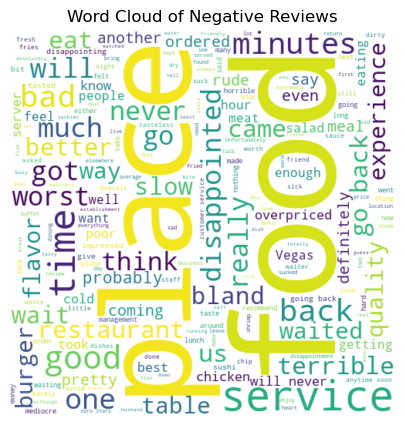

In [45]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter the DataFrame for negative reviews (where Liked is 0)
negative_reviews = data[data['Liked'] == 0]  # Use the correct column name for negative sentiment

# Combine all negative reviews into a single string
all_negative_reviews = ' '.join(negative_reviews['Review'])

# Generate the word cloud
wordcloud = WordCloud(width=500, height=500, background_color='white').generate(all_negative_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Negative Reviews')
plt.show()

In [46]:

import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming your DataFrame is called 'data' and it has 'Review' and 'Liked' columns
# Initialize TfidfVectorizer
tfidf = TfidfVectorizer(strip_accents=None, lowercase=True, preprocessor=None, use_idf=True, norm='l2', smooth_idf=True)

# Correctly assign the labels and text
y = data['Liked'].values  # Change 'Liked' to the actual name of your labels column
X = data['Review']  # Change 'Review' to the actual name of your text column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5, shuffle=False)

# Fit and transform the training data
X_train_vectorized = tfidf.fit_transform(X_train)

# Transform the test data
X_test_vectorized = tfidf.transform(X_test)

# Now 'X_train_vectorized' contains the TF-IDF features for training,
# and 'X_test_vectorized' contains the TF-IDF features for testing.


In [47]:

from sklearn.linear_model import LogisticRegressionCV

# Training the Logistic Regression model with cross-validation
clf = LogisticRegressionCV(cv=6, scoring='accuracy', random_state=0, n_jobs=-1, verbose=3, max_iter=500)
clf.fit(X_train_vectorized, y_train)  # Fit the model

# Making predictions
y_pred = clf.predict(X_test_vectorized)  


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         1380     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  6.29454D-02


ITERATION     1

---------------- CAUCHY entered-------------------
 There are            0   breakpoints 

 GCP found in this segment
Piece      1 --f1, f2 at start point  -5.2941D-03  5.2941D-03
Distance to the stationary point =   1.0000D+00

---------------- exit CAUCHY----------------------

        1380  variables are free at GCP            1
 LINE SEARCH           1  times; norm of step =    1.1765660773627843E-002

At iterate    1    f=  6.92719D-01    |proj g|=  6.03028D-02


ITERATION     2

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =    5.0420077549262678E-002

At iterate    2    f=  6.89910D-01    |proj g|=  4.77237D-02


ITERATION     3

--------

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This pr

In [48]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
# Model Accuracy, how often is the classifier correct?
print("Overall Accuracy:",metrics.accuracy_score(y_test, y_pred))

Overall Accuracy: 0.7702970297029703


In [49]:

class_report = classification_report(y_test, y_pred)

# Print Evaluation Metrics
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.79       290
           1       0.69      0.82      0.75       215

    accuracy                           0.77       505
   macro avg       0.77      0.78      0.77       505
weighted avg       0.78      0.77      0.77       505



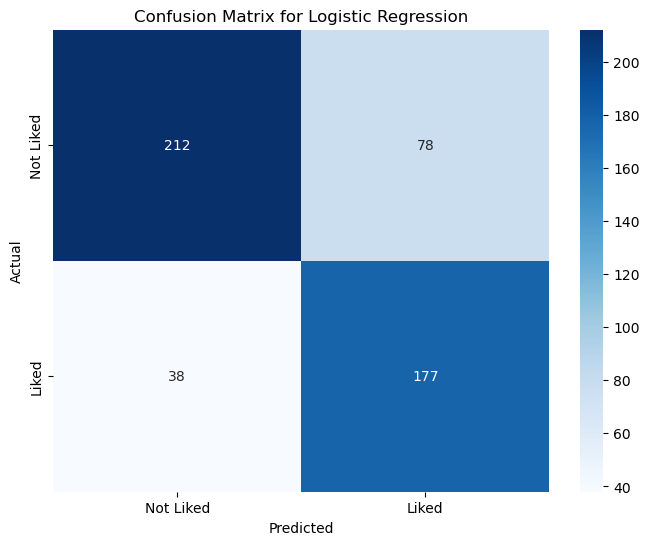

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Liked', 'Liked'], yticklabels=['Not Liked', 'Liked'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()



In [51]:

from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)  # Fit the model

# Making predictions
y_pred_nb = nb_model.predict(X_test_vectorized)


print("Overall Accuracy:",metrics.accuracy_score(y_test, y_pred_nb))

Overall Accuracy: 0.6653465346534654


In [52]:

class_report = classification_report(y_test, y_pred_nb)

# Print Evaluation Metrics
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.47      0.62       290
           1       0.56      0.93      0.70       215

    accuracy                           0.67       505
   macro avg       0.74      0.70      0.66       505
weighted avg       0.76      0.67      0.65       505



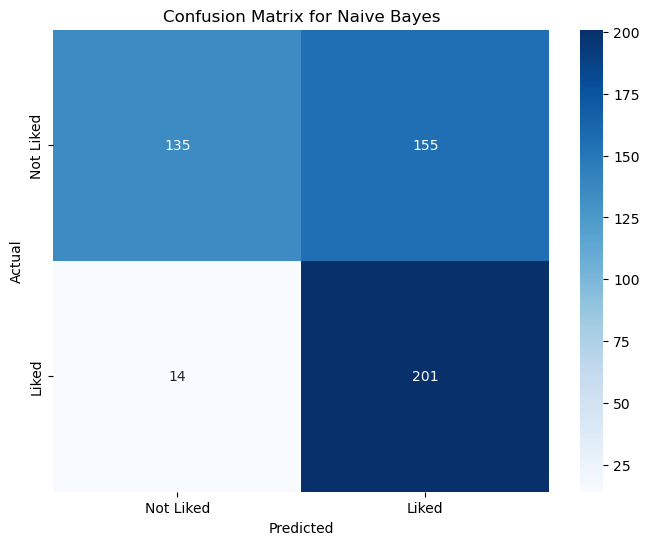

In [53]:


conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Liked', 'Liked'], yticklabels=['Not Liked', 'Liked'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()


In [54]:

from sklearn.ensemble import RandomForestClassifier

# Training the Random Forest model
rf_model = RandomForestClassifier()  # You can adjust n_estimators as needed
rf_model.fit(X_train_vectorized, y_train)  # Fit the model

# Making predictions
y_pred_rf = rf_model.predict(X_test_vectorized) 

print("Overall Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))


Overall Accuracy: 0.6831683168316832


In [55]:

class_report = classification_report(y_test, y_pred_rf)

# Print Evaluation Metrics
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.55      0.67       290
           1       0.59      0.87      0.70       215

    accuracy                           0.68       505
   macro avg       0.72      0.71      0.68       505
weighted avg       0.74      0.68      0.68       505



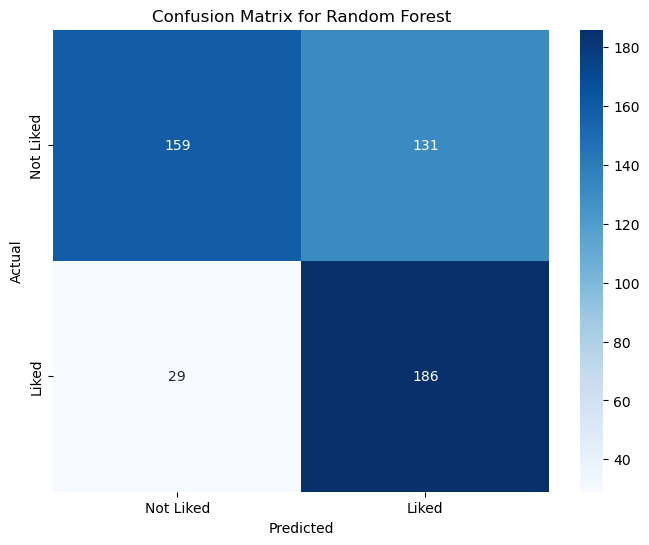

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined as in the previous code

# Step 1: Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Liked', 'Liked'], yticklabels=['Not Liked', 'Liked'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [57]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'clf' is your trained Logistic Regression model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(clf, file)  # Save the model to a file

# Assuming 'tfidf' is your fitted TfidfVectorizer
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)  # Save the vectorizer to a file

